In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
## Absenteeism Dataset

input_file = "~/Documents/Harrisburg University/ANLY - 530/Project/Absenteeism_at_work_train.csv"

df = pd.read_csv(input_file)


In [3]:
# Credit Dataset

input_file = "/Users/jujubibaba/Documents/Harrisburg University/ANLY - 530/Lab 1/credit.csv"
df = pd.read_csv(input_file)
target = df['Creditability']
y = target
X = df.drop(['Creditability'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 52)

In [4]:
# Wine Dataset

input_file = "/Users/jujubibaba/Documents/Harrisburg University/ANLY - 530/Lab 1/whitewines.csv"
df = pd.read_csv(input_file)
target = df['quality']
y = target
X = df.drop(['quality'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

In [5]:
# Classifying the models into different groups (0, 0-6, >6)

In [6]:
def model_eval(y_test, y_predict):
    print ("MSE of data: ", mean_squared_error(y_test,y_predict))
    print ("RMSE of data: ", sqrt(mean_squared_error(y_test,y_predict)))
    print ('\nOther Parameters:')
    print ("R² : ", r2_score(y_test,y_predict))
    print ('MAE:',mean_absolute_error(y_test,y_predict))
    print("\nConfusion Matrix\n" ,confusion_matrix(y_test, y_predict))
    print('Accuracy Score', accuracy_score(y_test, y_predict)*100)

In [20]:
# KMeans model

def kmeansnn(clusters, df):
    kmeans = KMeans(n_clusters = clusters, random_state = 1234).fit(df)
    #print('Cluster centers', kmeans.cluster_centers_)
    print('\nValues in each cluster\n', pd.Series(kmeans.labels_).value_counts())
    print('-----------------')
    sse = {}
    for k in range(2,19):
        kmeans = KMeans(n_clusters = k, random_state = 1234).fit(df)
        df["clusters"] = kmeans.labels_
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of clusters")
    plt.ylabel('SSE')
    plt.title('Elbow method for optimal number of clusters')
    plt.show()


In [8]:
# Decision Tree Model

def dt(X_train, X_test, y_train, y_test):
    model = tree.DecisionTreeClassifier()
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nDecision Tree :\n')
    model_eval(y_test, y_predict)


In [9]:
# Random Forest Model

def rf(n, X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators = n, random_state = 1234)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nRandom Forest :\n')
    model_eval(y_test, y_predict)
    # Interpreting feature importance using the Random Forest Model
    ax = (pd.Series(model.feature_importances_, index = X_train.columns).plot(kind = 'barh'))
    plt.show()

In [10]:
# Naive Bayes

# Naive Bayes is not suitable for this model as the features are not mutually independent as there is a clear correlation between multiple features, for example, height, weight and BMI etc. Running this model just as a curious experiment to observe the results.

def nb(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('\nNaive Bayes :\n')
    model_eval(y_test, y_predict)


In [11]:
# Support Vector Machine (SVM)

def svmc(krnl, X_train, X_test, y_train, y_test):
    if krnl in ['linear', 'poly', 'rbf']:
        from sklearn import svm
        model = svm.SVC(kernel=krnl)
        model = model.fit(X_train, y_train)
        y_predict = model.predit(X_test)
        print('SVM :', krnl, '\n')
        model_eval(y_test, y_predict)
    else:
        print('\nError:', krnl, 'is not a valid Kernel')


In [17]:
dt(X_train, X_test, y_train, y_test)


Decision Tree :

MSE of data:  0.689795918367347
RMSE of data:  0.8305395344999219

Other Parameters:
R² :  0.11037342615272239
MAE: 0.47591836734693876

Confusion Matrix
 [[  0   2   1   1   0   1   0]
 [  1   9  12   8   1   0   0]
 [  3  11 214 106  16   2   0]
 [  4  13 101 380  51  12   0]
 [  0   0  15  65 133  11   0]
 [  0   1   1  19  11  19   0]
 [  0   0   0   0   1   0   0]]
Accuracy Score 61.63265306122449



Random Forest :

MSE of data:  0.4636734693877551
RMSE of data:  0.6809357307321706

Other Parameters:
R² :  0.40200249237248087
MAE: 0.37387755102040815

Confusion Matrix
 [[  0   0   2   3   0   0   0]
 [  0   7  15   9   0   0   0]
 [  0   2 245 102   3   0   0]
 [  0   0  95 428  38   0   0]
 [  0   0  11  87 125   1   0]
 [  0   0   0  20  17  14   0]
 [  0   0   0   0   1   0   0]]
Accuracy Score 66.85714285714286


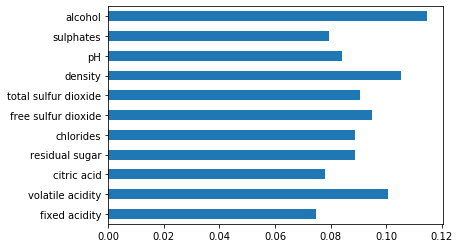

In [13]:
rf(100, X_train, X_test, y_train, y_test)

In [14]:
nb(X_train, X_test, y_train, y_test)


Naive Bayes :

MSE of data:  0.9559183673469388
RMSE of data:  0.9777107789867814

Other Parameters:
R² :  -0.23284345322504385
MAE: 0.686530612244898

Confusion Matrix
 [[  1   1   2   0   1   0   0]
 [  0   6  13   6   6   0   0]
 [  2  17 205  98  29   1   0]
 [  1  13 180 177 186   4   0]
 [  0   2  31  56 131   4   0]
 [  2   0   3  12  33   1   0]
 [  0   0   0   0   1   0   0]]
Accuracy Score 42.53061224489796



Values in each cluster
 0    1524
2    1291
4    1002
3     687
1     394
dtype: int64
-----------------


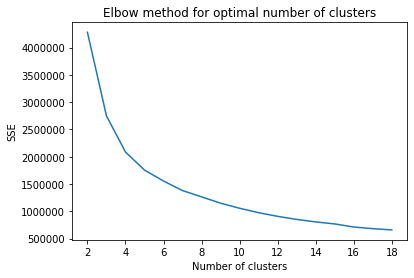

In [21]:
kmeansnn(5, df)

In [ ]:
svmc('linear', X_train, X_test, y_train, y_test)